# Ichthys - harmonic fit example notebook

#### Demonstration of simple analysis, evaluation, and prediction

Fitting the entire record of currents from each mooring.

Author: William Edge

Created: 03/10/23

In [40]:
import os
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from ichthys_harmonics.harmonic_funcs import rotate_predictions
from ichthys_harmonics.harmonic_lstsq import load_tide_predictions, rotate_2D
from ichthys_harmonics.plotfuncs import plot_decomposed_currents, plot_combined_currents, plot_speed

#### Load mooring data

Comment out the moorings you don't want to forecast at (only forecasting one at a time in this example).

In [41]:
### Select mooring
# moor = 'IchthysP1'
# moor = 'Fblock'
moor = 'Ichthys_CPF'
# moor = 'titanichthys'

# Find data
nc_dir = 'fits'

# Set the load order (don't change)
order = ['BTNS', 'BTEW', 'ITNS', 'ITEW']

#### Set the times we want predicted

In [42]:
# Set the prediction time (change the start and end dates here)
start = np.datetime64('2024-01-01')
end = np.datetime64('2024-01-07')
time_pred = create_time(start, end, step_minutes=10)

# Predict into the future

In [43]:
ds_pred = load_tide_predictions(time_pred, nc_dir, moor, order)

# Rotate the predictions
ds_pred = rotate_predictions(ds_pred)

/mnt/c/Users/00099894/OneDrive - The University of Western Australia/UWA/Inpex/pl/pckgs/ichthys_harmonics/ichthys_harmonics/harmonic_lstsq.py:142: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds_pred = xr.Dataset(coords={'time': time})
/mnt/c/Users/00099894/OneDrive - The University of Western Australia/UWA/Inpex/pl/pckgs/ichthys_harmonics/ichthys_harmonics/harmonic_funcs.py:183: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to suppor

/mnt/c/Users/00099894/OneDrive - The University of Western Australia/UWA/Inpex/pl/pckgs/ichthys_harmonics/ichthys_harmonics/harmonic_funcs.py:183: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds = xr.Dataset(
/mnt/c/Users/00099894/OneDrive - The University of Western Australia/UWA/Inpex/pl/pckgs/ichthys_harmonics/ichthys_harmonics/harmonic_funcs.py:183: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision 

### Plot the two components for each axis

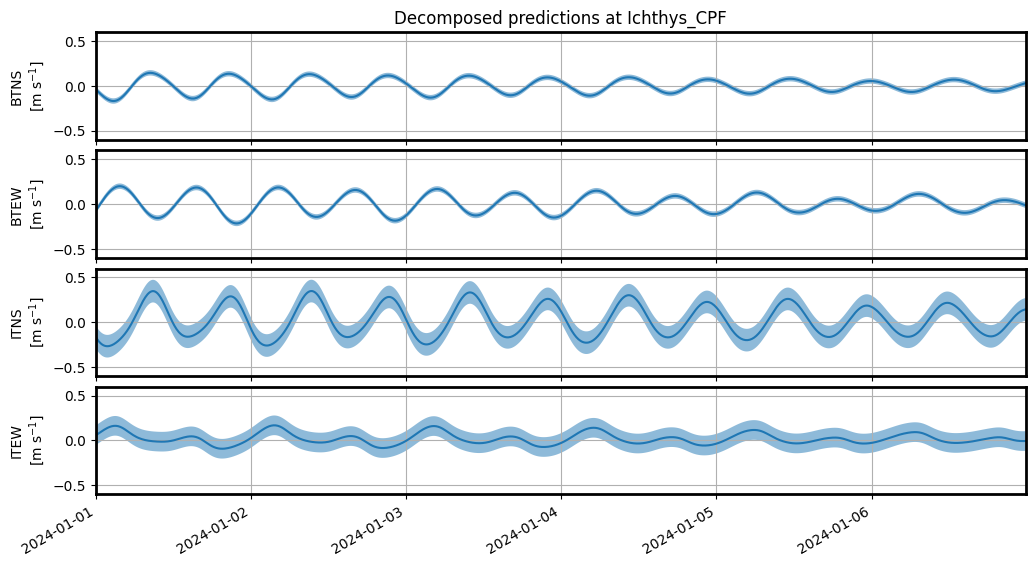

In [44]:
fig, ax = plot_decomposed_currents(ds_pred, order, moor, time_pred)

### Plot the combined forecast for each axis

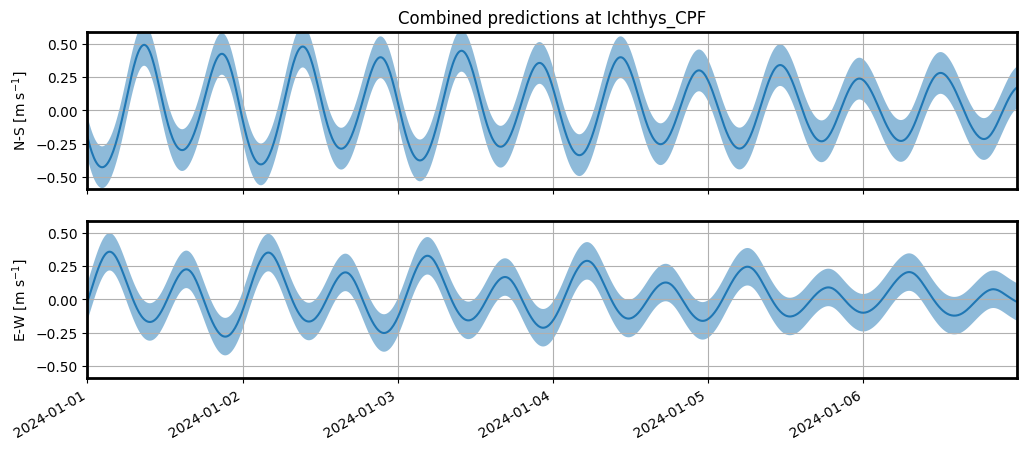

In [45]:
fig, ax = plot_combined_currents(ds_pred, order, moor, time_pred, ylim=0.59)

### Plot the total speed (in any direction)

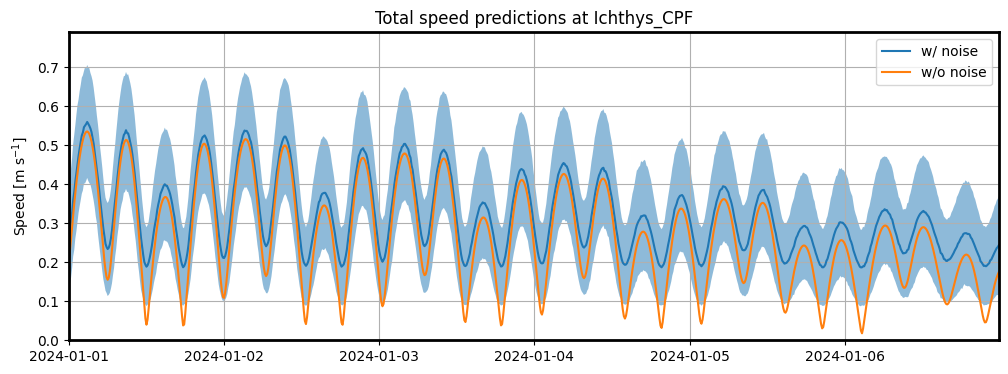

In [46]:
n_samp = 10000
fig, ax = plot_speed(ds_pred, order, moor, time_pred, samples=n_samp, ylim=0.79)